In [277]:
# Install Libraries
!pip install pycountry
!pip install langdetect

In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.downloader.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sarve\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sarve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Authentication
consumerKey = ""
consumerSecret = "0W8ltoYdzNbxSoaPVynv9iErIHYalzmdswAGeFF0Jm41zL0pgI"
accessToken = "1369747916521345027-p1Y5Ab8sJsa7uAY6hX06sVcZ0sKzDa"
accessTokenSecret = "B3UCbypl1DaWlW21NRJ59wvcDi5NvQoY6VF2xmiIPIjdM"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

# keyword = input("Please enter keyword or hashtag to search: ")
# noOfTweet = int(input ("Please enter how many tweets to analyze: "))
# keyword = "covid-19 OR vaccine OR vaccination OR covid OR covid19 OR astrazeneca OR pfizer OR moderna OR #vaccine"

keyword = "vaccine OR vaccination"
noOfTweet = 100
sincedate = "2021-01-01"
searchCountry = "Canada"


tweets = tweepy.Cursor(api.search, q=keyword, since=sincedate, granularity="country").items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [4]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  100
positive number:  24
negative number:  24
neutral number:  52


In [5]:
tweet_list

,0
0,RT @LegendaryEnergy: Anyone telling you “they ...
1,"@PrettyDamnRude_ I had it baaaad, sores all ov..."
2,RT @CNN: Vaccination alone won't stop the rise...
3,RT @CNN: Vaccination alone won't stop the rise...
4,RT @POTUS: The vaccine was developed and autho...
...,...
95,RT @sfrederickgray: At the @UUA we have paused...
96,All I know is this vaccine better work &amp; p...
97,RT @pwssypowa: Bonsoir je viens de tomber sur ...
98,RT @DonaldJTrumpJr: Someone should introduce a...


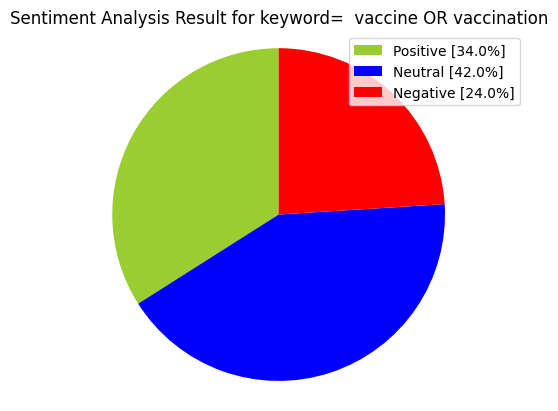

In [283]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [284]:
tweet_list.drop_duplicates(inplace = True)

In [286]:
tweet_list

,0
0,"RT @SouthPark: B.S.D.H.\n\nWatch the all-new ""..."
1,RT @notdred: My father in law believes a YouTu...
2,"@Fucthewrld @nypost Let me guess, you'll pick ..."
3,RT @SkyScottBeasley: 💉 NEW: Some much needed g...
4,"RT @WerepuppyTweets: It's like equating, say, ..."
...,...
94,"You get a call like this, @marcmolinaro? Is th..."
95,SK says risk out weighted the reward here. I s...
96,"""I know the federal government is trying. They..."
97,RT @3sidedstory: Did you know that the covid v...


In [287]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,"RT @SouthPark: B.S.D.H.\n\nWatch the all-new ""...",b s d h watch the all new south parq vacci...
1,RT @notdred: My father in law believes a YouTu...,my father in law believes a youtube video wit...
2,"@Fucthewrld @nypost Let me guess, you'll pick ...",let me guess you ll pick and choose a few...
3,RT @SkyScottBeasley: 💉 NEW: Some much needed g...,new some much needed good news the long a...
4,"RT @WerepuppyTweets: It's like equating, say, ...",it s like equating say dying in a car crash...
5,the way they knew about this already and STILL...,the way they knew about this already and still...
6,RT @NikkiHaley: This isn’t the time for victor...,this isn t the time for victory laps this is...
7,"""Does the AstraZeneca COVID vaccine cause bloo...",does the astrazeneca covid vaccine cause bloo...
8,"""I know the federal government is trying. They...",i know the federal government is trying they...
9,RT @finneas: If you live in the US and are ove...,if you live in the us and are over 18 you ha...


In [288]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"RT @SouthPark: B.S.D.H.\n\nWatch the all-new ""...",b s d h watch the all new south parq vacci...,0.297835,0.608658,positive,0.000,0.625,0.375,0.7184
1,RT @notdred: My father in law believes a YouTu...,my father in law believes a youtube video wit...,0.000000,0.100000,neutral,0.000,1.000,0.000,0.0000
2,"@Fucthewrld @nypost Let me guess, you'll pick ...",let me guess you ll pick and choose a few...,-0.200000,0.100000,neutral,0.000,1.000,0.000,0.0000
3,RT @SkyScottBeasley: 💉 NEW: Some much needed g...,new some much needed good news the long a...,0.197273,0.350909,positive,0.000,0.854,0.146,0.4404
4,"RT @WerepuppyTweets: It's like equating, say, ...",it s like equating say dying in a car crash...,0.000000,0.000000,negative,0.116,0.776,0.108,-0.0516
5,the way they knew about this already and STILL...,the way they knew about this already and still...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
6,RT @NikkiHaley: This isn’t the time for victor...,this isn t the time for victory laps this is...,0.000000,0.000000,positive,0.000,0.875,0.125,0.4588
7,"""Does the AstraZeneca COVID vaccine cause bloo...",does the astrazeneca covid vaccine cause bloo...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,"""I know the federal government is trying. They...",i know the federal government is trying they...,1.000000,0.300000,positive,0.000,0.819,0.181,0.6369
9,RT @finneas: If you live in the US and are ove...,if you live in the us and are over 18 you ha...,0.136364,0.500000,neutral,0.000,1.000,0.000,0.0000


In [289]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [290]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [291]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,34,38.64
neutral,31,35.23
negative,23,26.14


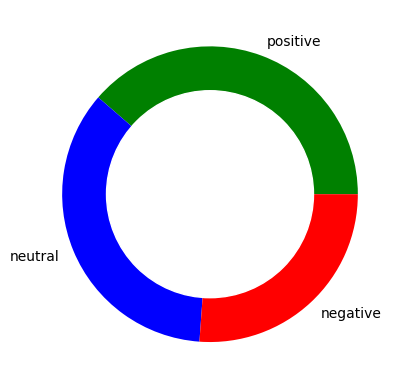

In [292]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [293]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


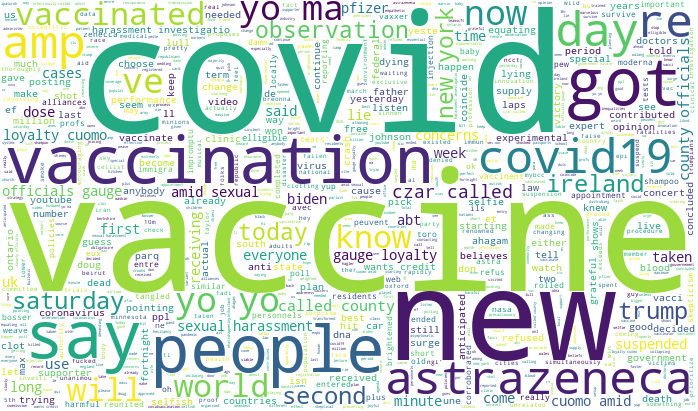

In [294]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


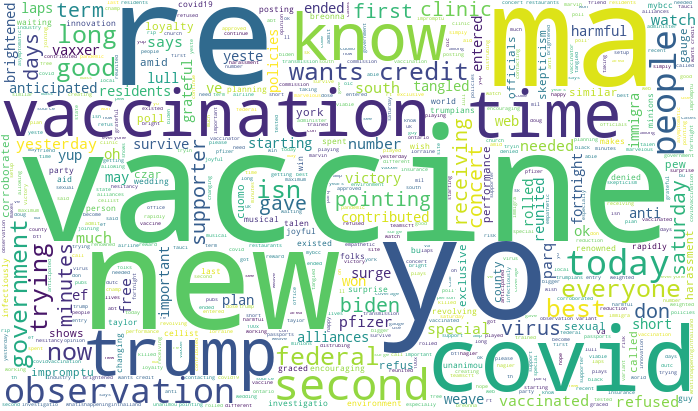

In [295]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


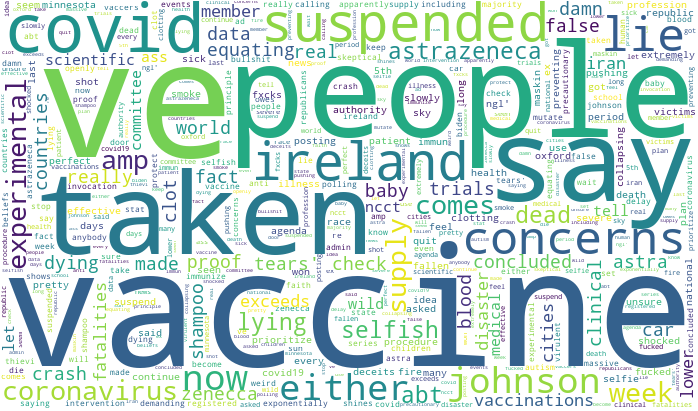

In [296]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


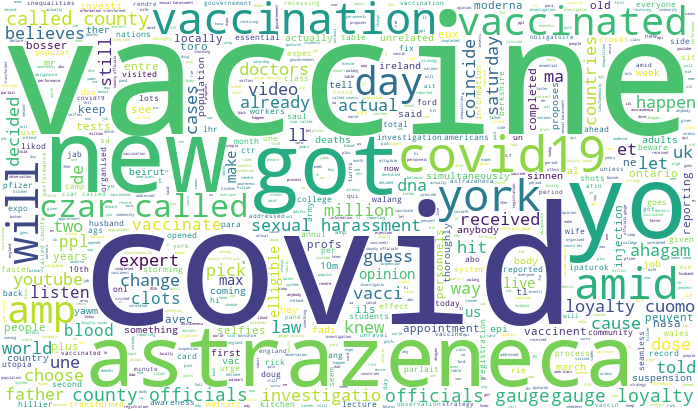

In [297]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [298]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [299]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,109.57
neutral,106.52
positive,106.88


In [300]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,19.04
neutral,18.42
positive,18.62


In [301]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [302]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [303]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [304]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [305]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [306]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,"RT @SouthPark: B.S.D.H.\n\nWatch the all-new ""...",b s d h watch the all new south parq vacci...,0.297835,0.608658,positive,0.000,0.625,0.375,0.7184,81,16,b s d h watch the all new south parq vacci...,"[, b, s, d, h, watch, the, all, new, south, pa...","[, b, h, watch, new, south, parq, vaccination,...","[, b, h, watch, new, south, parq, vaccin, spec..."
1,RT @notdred: My father in law believes a YouTu...,my father in law believes a youtube video wit...,0.000000,0.100000,neutral,0.000,1.000,0.000,0.0000,128,24,my father in law believes a youtube video wit...,"[, my, father, in, law, believes, a, youtube, ...","[, father, law, believes, youtube, video, two,...","[, father, law, believ, youtub, video, two, do..."
2,"@Fucthewrld @nypost Let me guess, you'll pick ...",let me guess you ll pick and choose a few...,-0.200000,0.100000,neutral,0.000,1.000,0.000,0.0000,101,19,let me guess you ll pick and choose a few...,"[, let, me, guess, you, ll, pick, and, choose,...","[, let, guess, pick, choose, countries, world,...","[, let, guess, pick, choos, countri, world, ha..."
3,RT @SkyScottBeasley: 💉 NEW: Some much needed g...,new some much needed good news the long a...,0.197273,0.350909,positive,0.000,0.854,0.146,0.4404,120,19,new some much needed good news the long a...,"[, new, some, much, needed, good, news, the, l...","[, new, much, needed, good, news, long, antici...","[, new, much, need, good, news, long, anticip,..."
4,"RT @WerepuppyTweets: It's like equating, say, ...",it s like equating say dying in a car crash...,0.000000,0.000000,negative,0.116,0.776,0.108,-0.0516,120,23,it s like equating say dying in a car crash...,"[, it, s, like, equating, say, dying, in, a, c...","[, like, equating, say, dying, car, crash, tak...","[, like, equat, say, die, car, crash, taken, v..."


In [307]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

88 Number of reviews has 551 words


In [308]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,abl,abo,abt,actual,ad,address,admin,administ,admit,adult,afin,ag,agenda,ahagam,ahead,aid,airlin,ait,al,allianc,allow,alreadi,american,amid,among,amp,ang,annul,anti,anticip,anybodi,appar,appoint,approv,area,armi,ask,ass,astra,...,viabl,victim,victori,video,viru,virul,visit,w,wait,walang,wale,walmart,want,watch,way,weav,web,wed,week,weight,weird,whatishappeninginthailand,wife,wild,win,wish,work,worker,world,would,x,yawm,year,yest,yesterday,yo,york,youtub,yup,zenecca
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [309]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
vaccin,71
covid,20
yo,13
get,11
new,10
peopl,8
say,7
got,7
astrazeneca,6
amp,6


In [310]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [311]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)
n2_bigrams

[('yo yo', 6),
 ('yo ma', 6),
 ('covid 19', 6),
 ('covid vaccine', 5),
 ('new york', 4),
 ('york vaccine', 4),
 ('vaccine czar', 4),
 ('czar called', 4),
 ('called county', 4),
 ('county officials', 4),
 ('officials gauge', 4),
 ('gauge loyalty', 4),
 ('loyalty cuomo', 4),
 ('cuomo amid', 4),
 ('amid sexual', 4),
 ('sexual harassment', 4),
 ('astrazeneca vaccine', 3),
 ('harassment investigatio', 3),
 ('wants credit', 3),
 ('pfizer vaccine', 3)]

In [312]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('yo yo ma', 6),
 ('new york vaccine', 4),
 ('york vaccine czar', 4),
 ('vaccine czar called', 4),
 ('czar called county', 4),
 ('called county officials', 4),
 ('county officials gauge', 4),
 ('officials gauge loyalty', 4),
 ('gauge loyalty cuomo', 4),
 ('loyalty cuomo amid', 4),
 ('cuomo amid sexual', 4),
 ('amid sexual harassment', 4),
 ('sexual harassment investigatio', 3),
 ('covid 19 vaccine', 3),
 ('know federal government', 2),
 ('federal government trying', 2),
 ('government trying doing', 2),
 ('trying doing best', 2),
 ('doing best just', 2),
 ('best just pointing', 2)]